In [2]:
# imports
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # le dossier doit exister

In [3]:
import pandas as pd

general_data = pd.read_csv('Donnees/general_data.csv')
employee_survey_data = pd.read_csv('Donnees/employee_survey_data.csv')
manager_survey_data = pd.read_csv('Donnees/manager_survey_data.csv')
in_time = pd.read_csv('Donnees/in_time.csv')
out_time = pd.read_csv('Donnees/out_time.csv')

In [4]:

def rename_column(dataset, name, position):
    tbl = dataset.columns.to_list()
    tbl[position] = name
    dataset.columns = tbl

rename_column(in_time, 'EmployeeID', 0)

# calculer les absence de chaque employé

def get_absence(dataset):
    absence = []
    for i in range(len(dataset)):
        absence.append(dataset.iloc[i].isna().sum())
    return absence

absence = get_absence(in_time)

# ajouter la colonne absence au dataset

in_time['absence'] = absence



In [5]:

# Drop certaines colonnes qui ne sont pas utiles dans general_data

general_data = general_data.drop(['Education', 'EducationField', 'Over18', 'TrainingTimesLastYear'], axis=1)

#On merge les 3 datasets

df = pd.merge(general_data, employee_survey_data, on='EmployeeID')
df = pd.merge(df, manager_survey_data, on='EmployeeID')
df = pd.merge(df, in_time[['EmployeeID', 'absence']], on='EmployeeID')

# On retrouve les valeurs manquantes et on les affiches en précisant le nombre de valeurs manquantes par colonne ainsi que leur type

df.isna().sum()



# df.head()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
absence                     0
dtype: int64

In [6]:
import numpy as np

def remplacer_valeurs_nulles(df, nom_colonne):
    # Vérifier le type de la colonne
    if df[nom_colonne].dtype == 'object':
        # Si la colonne est de type "object" (string), remplacer les valeurs nulles par la valeur la plus fréquente
        valeur_frequente = df[nom_colonne].mode()[0]
        df[nom_colonne].fillna(valeur_frequente, inplace=True)
    else:
        # Si la colonne est de type numérique, remplacer les valeurs nulles par la moyenne
        moyenne = np.mean(df[nom_colonne])
        df[nom_colonne].fillna(moyenne, inplace=True)


remplacer_valeurs_nulles(df, 'NumCompaniesWorked')
remplacer_valeurs_nulles(df, 'EnvironmentSatisfaction')
remplacer_valeurs_nulles(df, 'JobSatisfaction')
remplacer_valeurs_nulles(df, 'WorkLifeBalance')
remplacer_valeurs_nulles(df, 'TotalWorkingYears')

In [7]:
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
absence                    0
dtype: int64

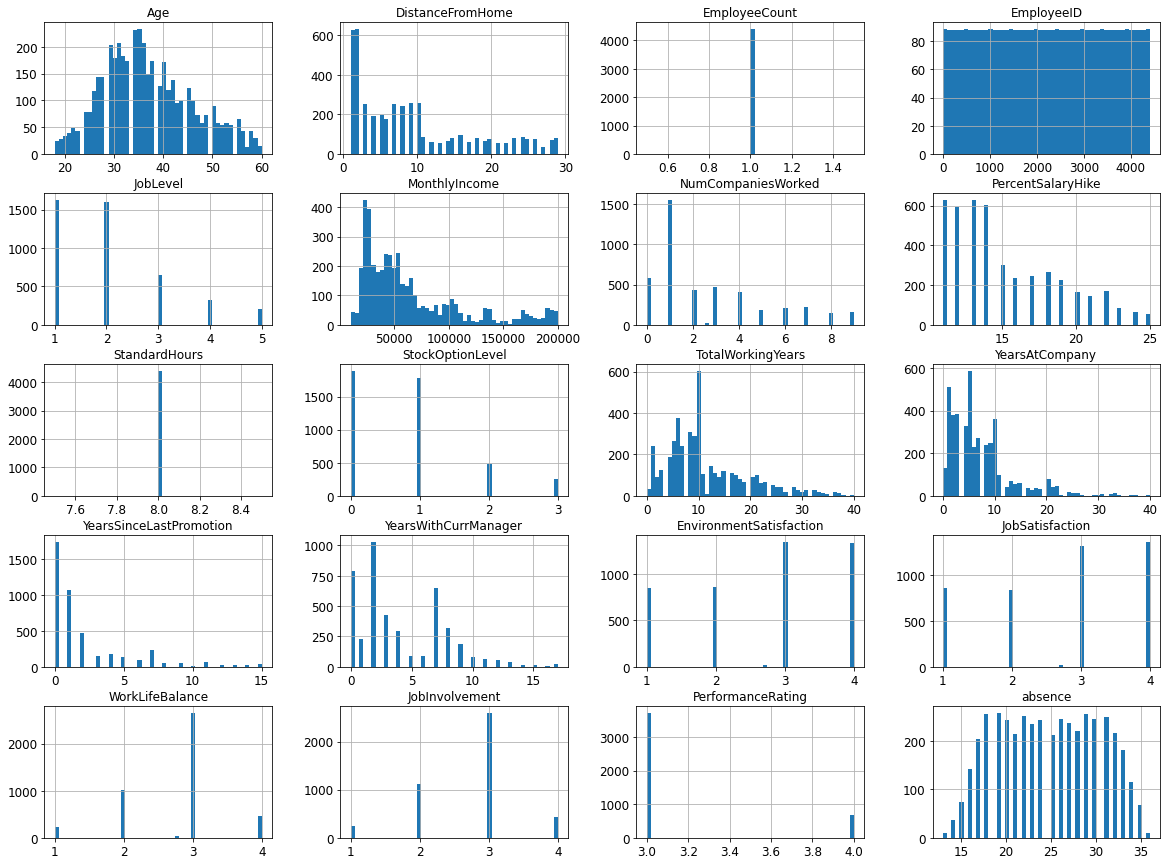

In [8]:
# Affichage en hist 

df.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)


In [11]:
corr_matrix = df.corr()
corr_matrix["Attrition"].sort_values(ascending=False)

Attrition                  1.000000
TotalWorkingYears          0.170111
Age                        0.159205
YearsWithCurrManager       0.156199
YearsAtCompany             0.134392
JobSatisfaction            0.102743
EnvironmentSatisfaction    0.101795
WorkLifeBalance            0.062561
absence                    0.043517
YearsSinceLastPromotion    0.033019
MonthlyIncome              0.031176
JobInvolvement             0.015588
MaritalStatus              0.011195
JobLevel                   0.010290
DistanceFromHome           0.009730
StockOptionLevel           0.006839
EmployeeID                 0.004729
JobRole                    0.002147
Gender                    -0.018125
PerformanceRating         -0.023403
PercentSalaryHike         -0.032533
Department                -0.041570
NumCompaniesWorked        -0.042232
BusinessTravel            -0.085306
EmployeeCount                   NaN
StandardHours                   NaN
Name: Attrition, dtype: float64

array([[<AxesSubplot:xlabel='Attrition', ylabel='Attrition'>,
        <AxesSubplot:xlabel='TotalWorkingYears', ylabel='Attrition'>,
        <AxesSubplot:xlabel='Age', ylabel='Attrition'>,
        <AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Attrition'>,
        <AxesSubplot:xlabel='YearsAtCompany', ylabel='Attrition'>],
       [<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>,
        <AxesSubplot:xlabel='TotalWorkingYears', ylabel='TotalWorkingYears'>,
        <AxesSubplot:xlabel='Age', ylabel='TotalWorkingYears'>,
        <AxesSubplot:xlabel='YearsWithCurrManager', ylabel='TotalWorkingYears'>,
        <AxesSubplot:xlabel='YearsAtCompany', ylabel='TotalWorkingYears'>],
       [<AxesSubplot:xlabel='Attrition', ylabel='Age'>,
        <AxesSubplot:xlabel='TotalWorkingYears', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Age'>,
        <AxesSubplot:xlabel='YearsAtCompany', ylabel='Age'>],
   

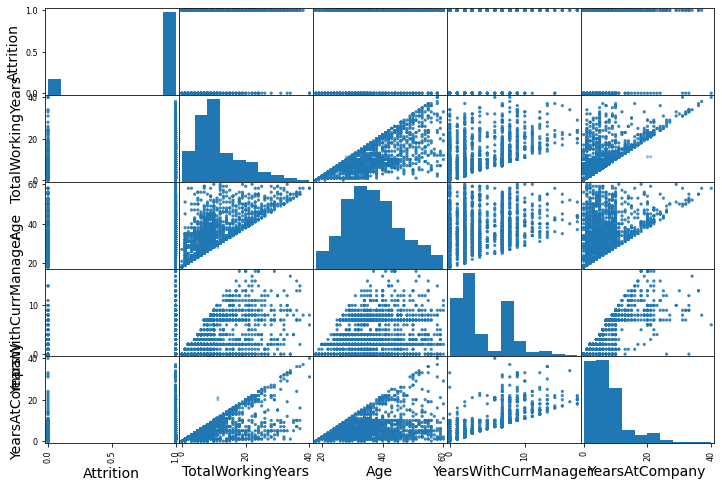

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["Attrition", "TotalWorkingYears", "Age", "YearsWithCurrManager", "YearsAtCompany" ]
scatter_matrix(df[attributes], figsize=(12, 8))
